In [1]:
#%config InlineBackend.figure_formats = ["svg"]
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA

from src import data

# Conceitos

## Ciência de dados

- Uma área de atuação que combina os conhecimentos de:

  - Engenharia de software
  - Engenharia de dados
  - Estatística
  - Business Intelligence
  - Inteligência Artificial
    > Nos poderíamos dizer que um cientista de dados é alguém que extrai ideias de dados bagunçados.

  Joel Grus - Data Science From Scratch: Tradução livre

## O que é Inteligência Artificial?

> Um agente racional que age para atingir o melhor resultado possível ou, quando houver incerteza, a melhor saída esperada.

Stuart J. Russell, Peter Norvig - Artificial Intelligence: A Modern Approach: Tradução livre
IAs não são programadas explicitamente para realizar uma tarefa, aprendem como realizar uma tarefa de acordo com os dados observados.

## O que é o melhor resultado?

É o resultado em que as **métricas** tem o melhor indicador possível.  
Métricas são utilizadas para medir a qualidade das previsões de uma IA.  
Modelos de IA são treinados utilizando **função de custo (loss function)**.  
Funções de custo servem para avaliar o desempenho da IA e ajustar seus parâmetros automaticamente.  
Existem casos em que a **função de custo** e as **métricas** são idênticas

## Qual a diferença entre Inteligência Artificial, Machine Learning, Deep Learning, Generative AI, LLM

Inteligência artificial é a definição mais ampla.  
**Machine learning (ML)** é um computador que observa dados, constrói um modelo baseado nos dados e utiliza os dados como um program capaz de solucionar problemas.  
**Deep Learning (DL)** é um subconjunto de **Machine Learning**, derivado de redes neurais. Redes neurais multi-camadas são consideradas redes de deep learning.  
**Generative AI** É, geralmente, um subconjunto de DL utilizado para criação artificial de elementos como texto, imagem, voz, música entre outros
**Large Language Model (LLM)** São modelos de linguagem utilizados para processar, interpretar e criar textos.

## Jargões

- Features, input, entrada: Dados utilizados para realizar a previsão.
- Label, rótulo: Dados que tentamos prever.
- Training set, Conjunto de treino: Conjunto de dados utilizado para realizar o treinamento de um modelo de IA
- Validation set, Conjunto de validação: Conjunto de dados extraído dos dados de treino utilizado para avaliar o desempenho de um modelo de IA, sem comprometer o conjunto de testes.
- Test set, Conjunto de testes: Conjunto de dados inédito para o modelo, utilizado para simular e avaliar o desempenho de um modelo no mundo real.
- Arquitetura (IA): Padrão de um modelo de IA. Exemplos: Regressão Linear, U-Net, YOLO
- Modelo: Uma arquitetura com pesos bem definidos.
- Modelos clássicos de ML: Geralmente,
- Pesos, Parâmetros: Valores (float) que um modelo pode alterar para melhorar seu desempenho durante o treinamento. Exemplo: O GPT 3.5 tem 1.5 trilhões de pesos
- Fit, Ajuste, Treinamento: Atualização dos pesos de um modelo.
- Modelo pré-treinado: Modelo desenvolvido e ajustado para uma tarefa com alguma base de dados. As bases de dados costumam ser de grande escala.
- Fine-tuning: Ajuste de um modelo para alguma tarefa específica, dentro do problema que foi treinado para resolver
- Transfer learning, transferência de aprendizagem: Utilização de um modelo de uma tarefa A para uma tarefa B, que tenha alguma similaridade.
- Epoch, época: Um ciclo completo por todos os dados de treino. Comum em Deep Learning
- Missing values: Campos vazios num conjunto de dados
- Perceptron: Uma arquitetura de rede neural artificial que simula um neurônio artificial.
- Rede neural: Conjunto de Perceptrons conectados, que formam uma camada. Redes neurais têm uma camada de entrada, uma camada de saída e uma quantidade qualquer de camadas ocultas.


EDA - California
Limpeza - SO
Preparação - SO
Engenharia Seleção - Playground

- Caminho feliz: LR 0.03, Tanh, None, 0, 2 HL 4-2, x1, x2
- Caminho feliz: x12, x22
- Caminho excesso: x1, x2, x1x2, sinx1, sinx2
- Caminho poucos 2: x1
- Caminho feliz 2: x1x2
  Engenharia Redução - MNIST
  Engenharia Anonimização - MNIST
  Conjunto de treino, validação e testes - MNIST
  Treinamento de modelos - MNIST
  Avaliação de modelos - MNIST
  Deployment? - Software 2.0 x Software 1.0


# Análise exploratória de Dados (EDA)
Verificação preliminar dos dados, para auxiliar nos processos de preparação de bases de dados e Business Intelligence.  
Assim como os outros processos, não é executado apenas uma vez. Com o modelo em produção, podemos estudar as causas dos erros de previsão do modelo durante esta etapa, numa nova iteração.  
De acordo com [Chloe Mawer](https://github.com/cmawer/pycon-2017-eda-tutorial/), alguns dos motivos de realizar uma EDA
1. Para o analista
    - Identifica padrões e desenvolve hipóteses
    - Testa premissas técnicas
    - Informa seleção de modelos e engenharia de features
    - Monta uma intuição sobre os dados
2. Para quem utiliza a análise
    - Garante a entrega de resultados tecnicamente sólidos
    - Garante que a pergunta correta está sendo feita
    - Testa premissas de negócio
    - Fornece contexto necessário para aplicabilidade máxima e valor dos resultados
    - Leva a ideias que não seriam identificadas de outra forma

In [2]:
data_dir = "data/"
housing = data.load_housing_data(data_dir)
housing.shape

/home/mascote/miniconda3/envs/workshop/lib/python3.11/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'github.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/mascote/miniconda3/envs/workshop/lib/python3.11/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


(20640, 10)

In [3]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
# Estatísticas descritivas
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


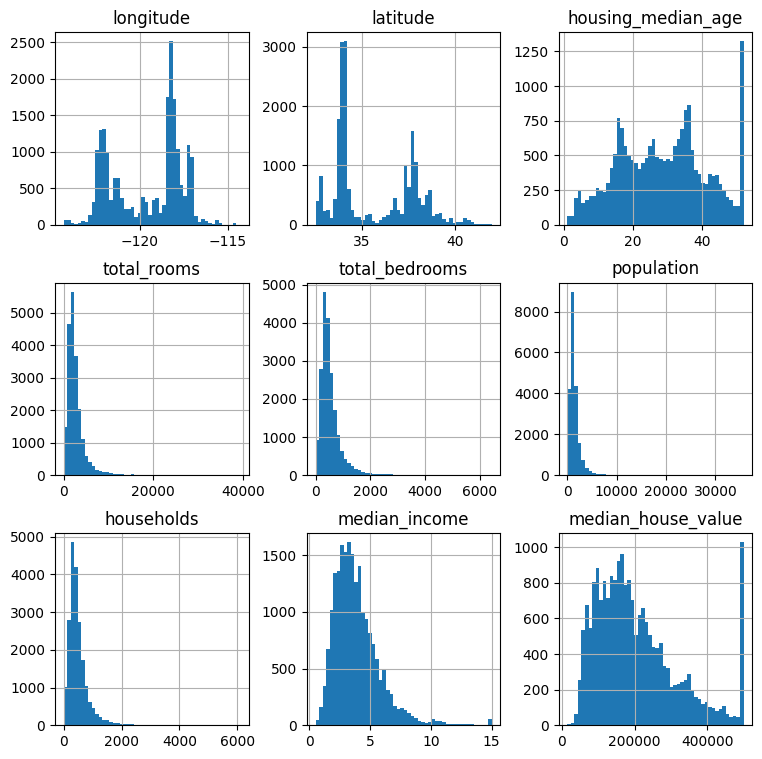

In [7]:
figure = housing.hist(bins=50, figsize=(9, 9))
plt.show()

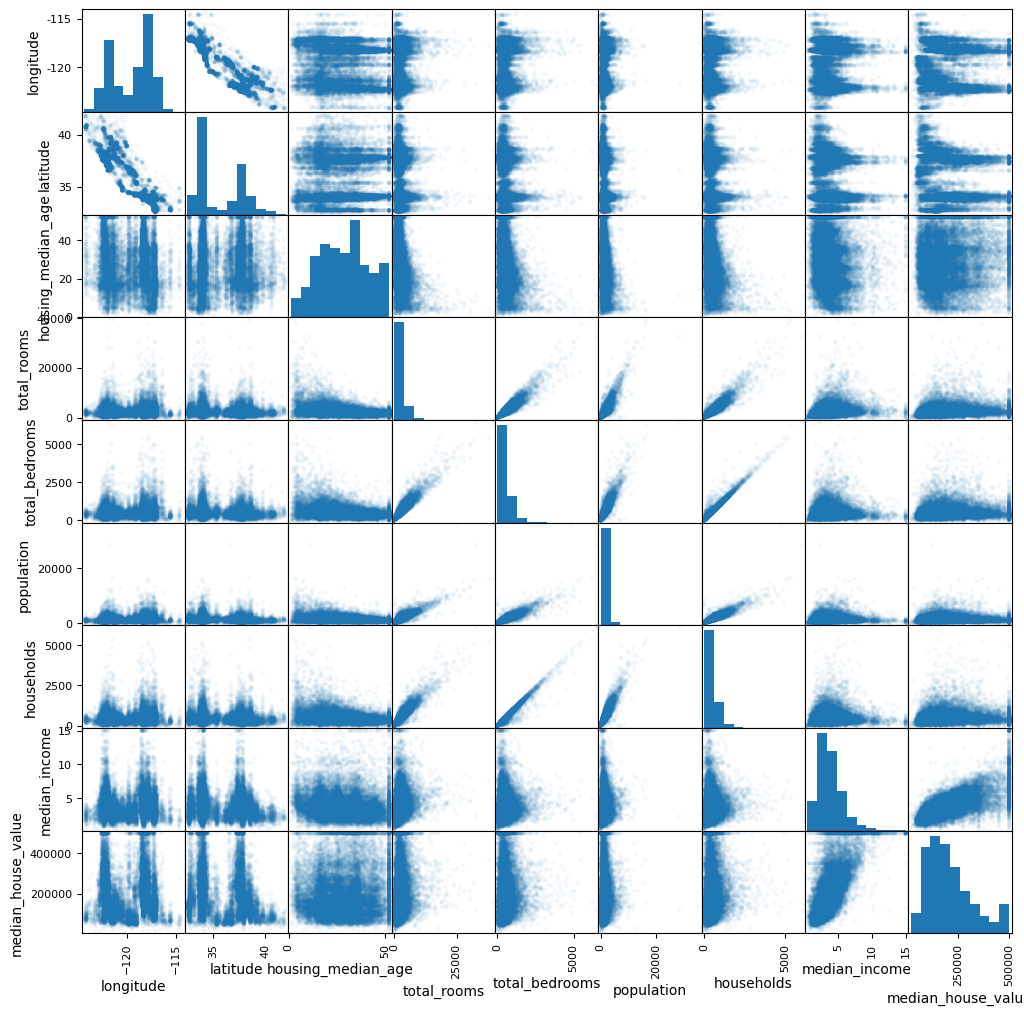

In [8]:
pd.plotting.scatter_matrix(housing, figsize=(12, 12), alpha=0.05)
plt.show()

In [9]:
px.scatter(
    housing,
    x="longitude",
    y="latitude",
    size="population",
    color="median_house_value",
    height=600,
    width=800,
    color_continuous_scale="jet",
    title="Distribuição de população e valor do imóvel"
)

# Limpeza e preparação
## Limpeza
É a etapa em que são verificadas e tratadas inconsistências na base de dados.  
Exemplos comuns de inconsistências:
- Dados duplicados
- Identificador único duplicado com diferentes registros
- Dados sem preenchimento
- Valores impossíveis

## Preparação
É a etapa em que os dados são transformados para um formato que seja útil para quem consumirá, seja para BI, seja para Modelos de IA  
Exemplos comuns de preparação:
- Extração de campos de texto
- Tokenização de campos de texto
- Normalização e padronização de campos numéricos
- Tratamento de outliers

In [10]:
survey_base = "so_survey_{year}/"
years = [2022]
for year in years:
    survey_dir = os.path.join(data_dir, survey_base.format(year=year))
    survey_file = os.path.join(survey_dir, "survey_results_public.csv")
    survey_file = os.path.normpath(survey_file)
    if not os.path.exists(survey_file):
        data.stack_overflow_survey(year, data_dir, survey_dir)

/home/mascote/miniconda3/envs/workshop/lib/python3.11/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'info.stackoverflowsolutions.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



In [11]:
survey_2022 = pd.read_csv("data/so_survey_2022/survey_results_public.csv")
survey_2022_metadata = pd.read_csv(
    "data/so_survey_2022/survey_results_schema.csv")
survey_2022.shape

(73268, 79)

In [12]:
survey_2022.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [13]:
survey_2022_info = pd.DataFrame()
survey_2022_info["not_null"] = (~survey_2022.isna()).sum()
survey_2022_info["dtypes"] = survey_2022.dtypes
survey_2022_info = survey_2022_info.reset_index()

In [14]:
instances, columns = survey_2022.shape
bar_props = dict(
    data_frame=survey_2022_info,
    x="index",
    y="not_null",
    color="dtypes",
    height=600,
    width=800,
    orientation="v",
    title="Survey 2022 - Missing values",
)
scatter_props = dict(
    x=survey_2022_info.iloc[[0, -1], 0],
    y=[instances] * 2,
    mode="lines",
    showlegend=False,
)
layout_props = dict(
    xaxis=dict(
        range=[-0.5, 9.5],
        rangeslider=dict(visible=True),
        type="category",
        title="Question Name",
    ),
    yaxis=dict(
        range=[0, 10**np.log10(instances) * 1.1],
        title="Not Null",
    ),
)

figure = px.bar(**bar_props)
figure.add_trace(go.Scatter(**scatter_props))
figure.update_layout(**layout_props)


In [15]:
survey_2022.describe(include="object")

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase
count,73268,71709,58958,58899,71571,71580,50685,29389,71331,51833,...,34515,36198,36022,35679,34906,35819,35715,35749,70444,70508
unique,6,103,3,63,9,737,7192,206,52,52,...,5,5,5,5,155,2,2,2,3,3
top,I am a developer by profession,"Employed, full-time",Fully remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",Technical documentation;Blogs;Written Tutorial...,Udemy,10,3,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,Somewhat long,None of these,Yes,Yes,Yes,Appropriate in length,Easy
freq,53507,42962,25341,18118,30276,3669,715,5643,5217,4261,...,17666,13652,11871,12961,4658,23767,22716,28027,53883,47886


In [16]:
figure = px.bar(survey_2022.Employment.value_counts().reset_index(), x="Employment", y="count", log_y=True)

layout_props = dict(
    xaxis=dict(
        range=[-0.5, 9.5],
        rangeslider=dict(visible=True),
        type="category",
    ),
    yaxis=dict(range=[0, 5])
)
figure.update_layout(**layout_props)

In [17]:
def split_field(value):
    if not isinstance(value, str):
        return [None]
    return value.split(";")
process_survey_2022 = survey_2022.copy()
process_survey_2022["Employment"] = process_survey_2022.Employment.apply(split_field)
process_survey_2022 = process_survey_2022.explode("Employment")
process_survey_2022.shape

(85919, 79)

In [18]:
figure = px.bar(process_survey_2022.Employment.value_counts().reset_index(), x="Employment", y="count", log_y=True)

layout_props = dict(
    xaxis=dict(
        type="category",
    ),
    yaxis=dict(range=[0, 5])
)
figure.update_layout(**layout_props)

# Engenharia de features
Etapa que seleciona, cria e modifica features da base de dados original, buscando melhorar a performance do modelo.  
## Seleção de features
Processo que seleciona apenas as features com maior impacto positivo para o modelo.
Demonstração:
https://playground.tensorflow.org/
## Redução de dimensionalidade
Processo que busca remover features redundantes ou que não acrescentem na previsão do modelo.

In [19]:
mnist = data.load_mnist(data_dir)
mnist.shape

/home/mascote/miniconda3/envs/workshop/lib/python3.11/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



(42000, 785)

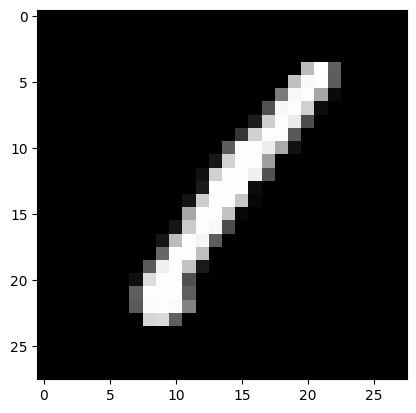

In [20]:
x = mnist.iloc[:, 1:].values
plt.imshow(x[0].reshape(28, 28), cmap="gray")

In [21]:
pca = PCA(n_components=0.95)
pca_x = pca.fit_transform(x)
pca_x.shape

(42000, 154)

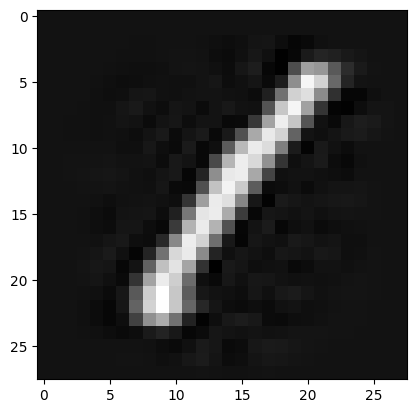

In [22]:
reverse_x = pca.inverse_transform(pca_x)
plt.imshow(reverse_x[0].reshape(28, 28), cmap="gray")

## Anonimização de dados
Processo que visa impossibilitar a identificação de algum usuário, fonte de informação ou mascarar qualquer outro tipo de informação sensível

In [23]:
anon_pca = PCA(n_components=28*28)
anon_pca_x = anon_pca.fit_transform(x)
anon_pca_x.shape

(42000, 784)

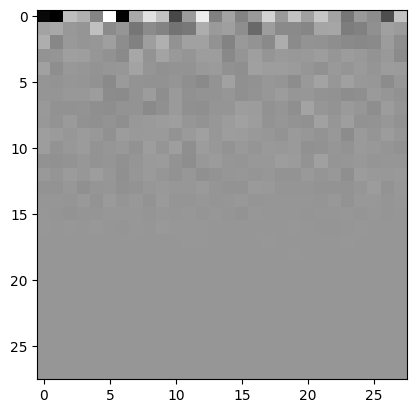

In [24]:
plt.imshow(anon_pca_x[0].reshape(28, 28), cmap="gray")

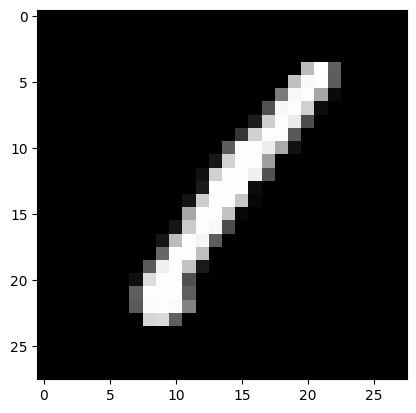

In [25]:
reverse_anon_x = anon_pca.inverse_transform(anon_pca_x)
plt.imshow(reverse_anon_x[0].reshape(28, 28), cmap="gray")

# Conjunto de treino, validação e teste
Para evitar problemas de generalização, um conjunto de dados normalmente é separado em 2 conjuntos:
- Conjunto de treino
- Conjunto de teste
O conjunto de treino é utilizado para treinar o modelo, enquanto o de teste para avaliar se o modelo consegue generalizar bem com dados nunca vistos antes.  
O conjunto de treino é dividido em outros 2 conjuntos durante o treinamento do modelo:
- Conjunto de treino
- Conjunto de validação
O conjunto de validação é utilizado para validar a performance do modelo antes de passar pelo conjunto de testes, num processo conhecido como validação cruzada.
# Treinamento de modelos
Em modelos de Machine Learning Clássico, é comum que o treinamento do modelo sempre ocorra do 0, recalculando todos os parâmetros para aquela arquitetura.  
Em técnicas de otimização iterativas, como o gradiente descendente, é posśivel ajustar o modelo de forma gradativa.
# Avaliação de modelos
Varia conforme o tipo de tarefa que o modelo deve executar. Para problemas de classificação, algumas formas comuns para avaliação do modelo são:
- Curva ROC
- Matriz de confusão
- Acurácia, Precisão, Recall, F1-score
# Deployment
É a etapa de publicação do modelo em produção. Inclui:
- API para comunicação com o modelo
- Endpoint para ajuste iterativo do modelo
- Observabilidade de métricas do modelo para avaliar deterioração ao longo do tempo
- Rollback para versão antiga, no caso de um modelo novo apresentar um desempenho abaixo do esperado